In [12]:
# !pip install bokeh

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [14]:
# data.columns

In [15]:
# outdata = data.drop('Required_IOS_Version', axis=1)

In [16]:
# outdata.info()

In [17]:
# outdata.rename(columns={
#     'Primary_Genre' : 'Category',
#     'Content_Rating' : 'Avalible age',
#     'Price' : 'Price',
#     'Free' : 'Free',
#     'Average_User_Rating' : 'Rating',
#     'Reviews' : 'Reviews',
#     'Size' : 'Size'
# },inplace=True)

In [18]:
# def type_cat(types):
#     if types == True:
#         return 0
#     else:
#         return 1

# outdata['Free'] = outdata['Free'].map(type_cat)

In [19]:
# cols = ['Category','Rating','Reviews','Size','Free','Price','Avalible age']
# outdata[cols]

In [20]:
# outdata

In [21]:
# outdata.to_csv('appstore_tableau.csv')

In [22]:
data = pd.read_csv('../dataset/appleAppData.csv')

In [23]:
data.columns

Index(['App_Id', 'App_Name', 'AppStore_Url', 'Primary_Genre', 'Content_Rating',
       'Size_Bytes', 'Required_IOS_Version', 'Released', 'Updated', 'Version',
       'Price', 'Currency', 'Free', 'DeveloperId', 'Developer',
       'Developer_Url', 'Developer_Website', 'Average_User_Rating', 'Reviews',
       'Current_Version_Score', 'Current_Version_Reviews'],
      dtype='object')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230376 entries, 0 to 1230375
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   App_Id                   1230376 non-null  object 
 1   App_Name                 1230375 non-null  object 
 2   AppStore_Url             1230376 non-null  object 
 3   Primary_Genre            1230376 non-null  object 
 4   Content_Rating           1230376 non-null  object 
 5   Size_Bytes               1230152 non-null  float64
 6   Required_IOS_Version     1230376 non-null  object 
 7   Released                 1230373 non-null  object 
 8   Updated                  1230376 non-null  object 
 9   Version                  1230376 non-null  object 
 10  Price                    1229886 non-null  float64
 11  Currency                 1230376 non-null  object 
 12  Free                     1230376 non-null  bool   
 13  DeveloperId              1230376 non-null 

In [25]:
data['is_same_col'] = data['Current_Version_Score'] != data['Average_User_Rating']
print(data['is_same_col'].sum()) # 모두 True인지 확인. 1개만 다름  = 제거.

1


In [26]:
data['is_same'] = data['Current_Version_Reviews'] == data['Reviews']
print(data['is_same'].all()) # 모두 True인지 확인

True


In [27]:
data['Average_User_Rating'].unique()
# 제거대상
# App_Id, AppStore_Url, Released, Updated, Version, DeveloperId, Developer, Developer_Url, Developer_Website, Current_Version_Score, Current_Version_Reviews, Currency

array([0.     , 5.     , 4.78132, ..., 4.00352, 3.91608, 4.82733])

In [28]:
cols = ['App_Name', 'App_Id', 'AppStore_Url', 'Released', 'Updated', 'Version', 'DeveloperId', 'Developer', 'Developer_Url', 'Developer_Website', 'Current_Version_Score', 'Current_Version_Reviews', 'is_same','is_same_col']
data.drop(columns=cols, inplace=True)
data.head()

,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Price,Currency,Free,Average_User_Rating,Reviews
0,Education,4+,21993472.0,8.0,0.00,USD,True,0.0,0
1,Book,4+,13135872.0,10.0,0.00,USD,True,5.0,1
2,Book,4+,21943296.0,9.0,0.00,USD,True,0.0,0
3,Book,4+,81851392.0,8.0,2.99,USD,False,0.0,0
4,Reference,4+,64692224.0,9.0,0.00,USD,True,0.0,0


In [29]:
# 이용가능 연령대 정수인코딩로 결정.
data['Content_Rating'].unique()

array(['4+', '17+', '9+', '12+', 'Not yet rated'], dtype=object)

In [30]:
data.drop('Currency', axis=1, inplace=True)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230376 entries, 0 to 1230375
Data columns (total 8 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Primary_Genre         1230376 non-null  object 
 1   Content_Rating        1230376 non-null  object 
 2   Size_Bytes            1230152 non-null  float64
 3   Required_IOS_Version  1230376 non-null  object 
 4   Price                 1229886 non-null  float64
 5   Free                  1230376 non-null  bool   
 6   Average_User_Rating   1230376 non-null  float64
 7   Reviews               1230376 non-null  int64  
dtypes: bool(1), float64(3), int64(1), object(3)
memory usage: 66.9+ MB


In [32]:
data.isnull().sum().sort_values(ascending=False)

Price                   490
Size_Bytes              224
Primary_Genre             0
Content_Rating            0
Required_IOS_Version      0
Free                      0
Average_User_Rating       0
Reviews                   0
dtype: int64

In [33]:
# 가격이나 파일의 크기는 trend를 반영하지 않음으로 평균값으로 대체.
data['Price'].fillna(data['Price'].mean(), inplace=True)
data['Size_Bytes'].fillna(data['Size_Bytes'].mean(), inplace=True)

In [34]:
data.isnull().sum()

Primary_Genre           0
Content_Rating          0
Size_Bytes              0
Required_IOS_Version    0
Price                   0
Free                    0
Average_User_Rating     0
Reviews                 0
dtype: int64

<Axes: >

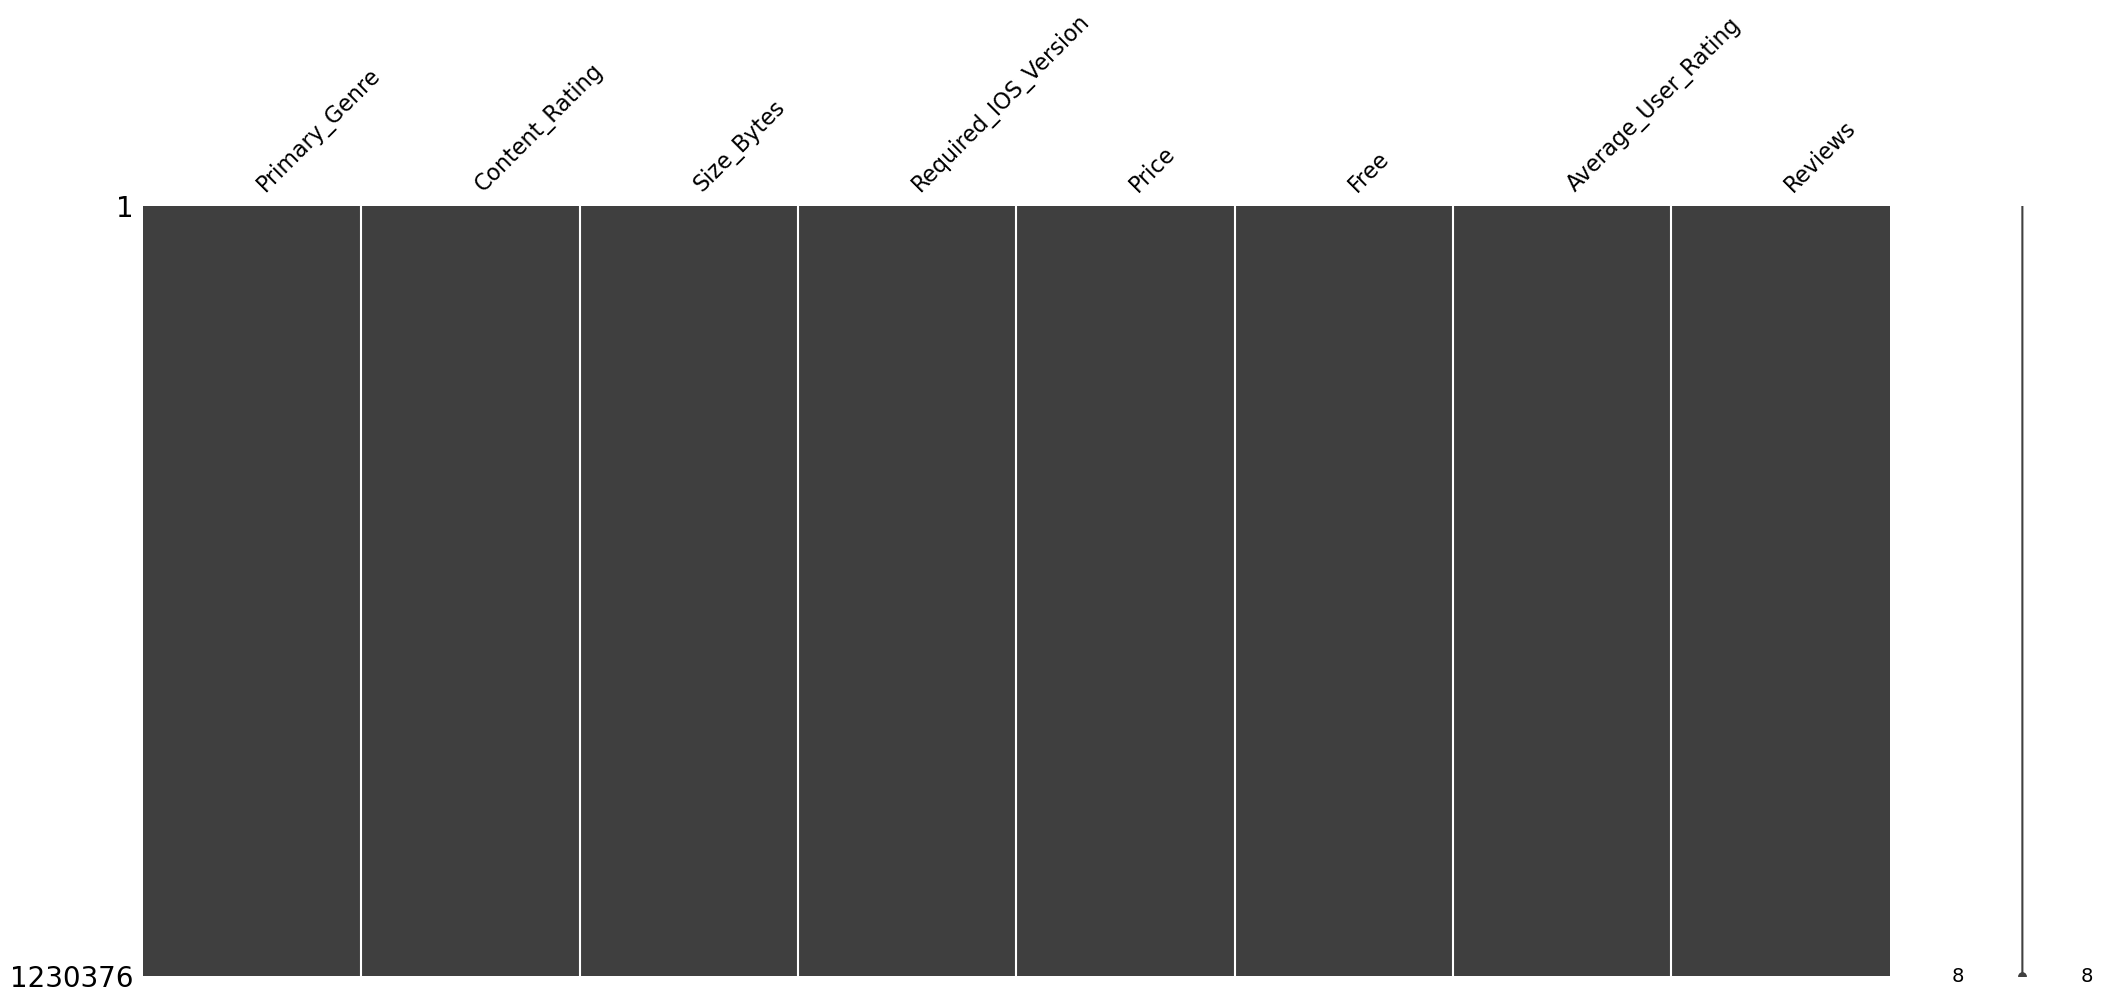

In [35]:
msno.matrix(data)

In [36]:
# 'byte -> megabyte'로 변환 후 반올림. byte컬럼 삭제
data['Size'] = (data['Size_Bytes'] / (1024*1024)).round()
data.drop('Size_Bytes', axis=1, inplace=True)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230376 entries, 0 to 1230375
Data columns (total 8 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Primary_Genre         1230376 non-null  object 
 1   Content_Rating        1230376 non-null  object 
 2   Required_IOS_Version  1230376 non-null  object 
 3   Price                 1230376 non-null  float64
 4   Free                  1230376 non-null  bool   
 5   Average_User_Rating   1230376 non-null  float64
 6   Reviews               1230376 non-null  int64  
 7   Size                  1230376 non-null  float64
dtypes: bool(1), float64(3), int64(1), object(3)
memory usage: 66.9+ MB


In [38]:
# 데이터 간결화 - 가격,크기는 반올림 후 정수화
data['Size'] = data['Size'].astype(int)
data['Price'] = data['Price'].round().astype(int)
data['Average_User_Rating'] = data['Average_User_Rating'].round(2)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230376 entries, 0 to 1230375
Data columns (total 8 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Primary_Genre         1230376 non-null  object 
 1   Content_Rating        1230376 non-null  object 
 2   Required_IOS_Version  1230376 non-null  object 
 3   Price                 1230376 non-null  int32  
 4   Free                  1230376 non-null  bool   
 5   Average_User_Rating   1230376 non-null  float64
 6   Reviews               1230376 non-null  int64  
 7   Size                  1230376 non-null  int32  
dtypes: bool(1), float64(1), int32(2), int64(1), object(3)
memory usage: 57.5+ MB


In [40]:
data['Primary_Genre'].nunique(), data['Primary_Genre'].unique()

(26,
 array(['Education', 'Book', 'Reference', 'News', 'Lifestyle',
        'Health & Fitness', 'Games', 'Medical', 'Food & Drink', 'Sports',
        'Shopping', 'Entertainment', 'Utilities', 'Stickers',
        'Productivity', 'Music', 'Photo & Video', 'Travel', 'Business',
        'Social Networking', 'Magazines & Newspapers', 'Navigation',
        'Finance', 'Weather', 'Graphics & Design', 'Developer Tools'],
       dtype=object))

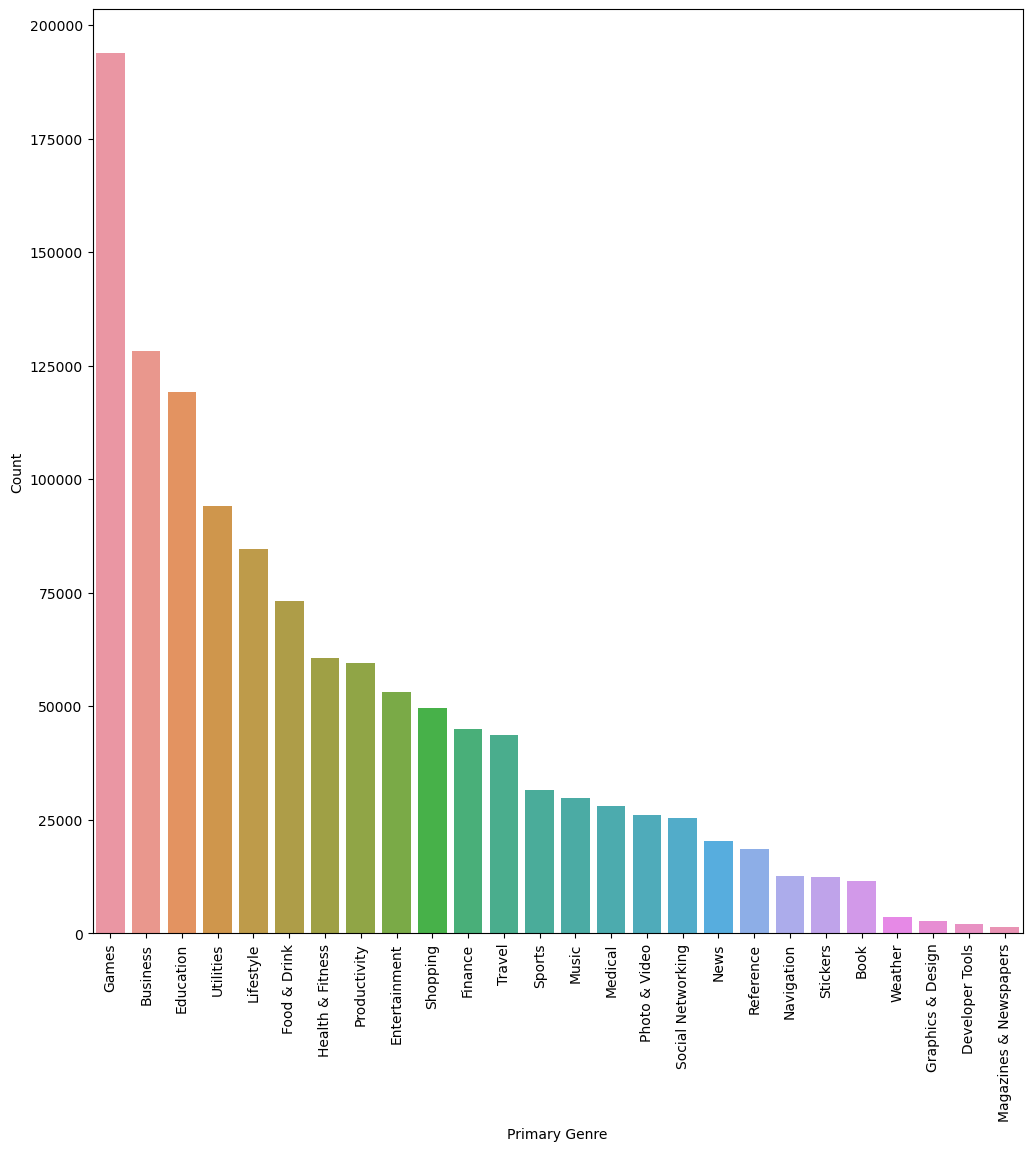

In [41]:
plt.figure(figsize=(12,12))
sns.barplot(x=data['Primary_Genre'].value_counts().index,
            y=data['Primary_Genre'].value_counts().values)
plt.xlabel('Primary Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [42]:
''' 
이용가능 연령대 - encoding
everyone - 0
kid - 1
children - 2
teens - 3
adults - 4
'''
data['Content_Rating'] = data['Content_Rating'].replace('4+', 1)
data['Content_Rating'] = data['Content_Rating'].replace('9+', 2)
data['Content_Rating'] = data['Content_Rating'].replace('12+', 3)
data['Content_Rating'] = data['Content_Rating'].replace('17+', 4)
data['Content_Rating'] = data['Content_Rating'].replace('Not yet rated', 0)
data['Content_Rating'] = data['Content_Rating'].astype(int)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230376 entries, 0 to 1230375
Data columns (total 8 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Primary_Genre         1230376 non-null  object 
 1   Content_Rating        1230376 non-null  int32  
 2   Required_IOS_Version  1230376 non-null  object 
 3   Price                 1230376 non-null  int32  
 4   Free                  1230376 non-null  bool   
 5   Average_User_Rating   1230376 non-null  float64
 6   Reviews               1230376 non-null  int64  
 7   Size                  1230376 non-null  int32  
dtypes: bool(1), float64(1), int32(3), int64(1), object(2)
memory usage: 52.8+ MB


In [44]:
data['Primary_Genre'].unique()

array(['Education', 'Book', 'Reference', 'News', 'Lifestyle',
       'Health & Fitness', 'Games', 'Medical', 'Food & Drink', 'Sports',
       'Shopping', 'Entertainment', 'Utilities', 'Stickers',
       'Productivity', 'Music', 'Photo & Video', 'Travel', 'Business',
       'Social Networking', 'Magazines & Newspapers', 'Navigation',
       'Finance', 'Weather', 'Graphics & Design', 'Developer Tools'],
      dtype=object)

In [45]:
import category_encoders as ce

In [46]:
data.Primary_Genre.unique()

array(['Education', 'Book', 'Reference', 'News', 'Lifestyle',
       'Health & Fitness', 'Games', 'Medical', 'Food & Drink', 'Sports',
       'Shopping', 'Entertainment', 'Utilities', 'Stickers',
       'Productivity', 'Music', 'Photo & Video', 'Travel', 'Business',
       'Social Networking', 'Magazines & Newspapers', 'Navigation',
       'Finance', 'Weather', 'Graphics & Design', 'Developer Tools'],
      dtype=object)

In [ ]:
data.rename(columns={'Primary_Genre' : 'Category',
                      'Content_Rating' : 'Avalible_age',
                      'Average_User_Rating' : 'Rating',
                      }, inplace=True)

In [69]:
# BinaryEncoder 인스턴스 생성
encoder = ce.BinaryEncoder(cols=['Category'], return_df=True)

In [70]:
encoder

BinaryEncoder(cols=['Category'])

In [71]:
# 데이터에 바이너리 인코더를 적용
data_bin = encoder.fit_transform(data)
data_bin

,Category_0,Category_1,Category_2,Category_3,Category_4,Avalible_age,Required_IOS_Version,Price,Free,Rating,Reviews,Size
0,0,0,0,0,1,1,8.0,0,True,0.00,0,21
1,0,0,0,1,0,1,10.0,0,True,5.00,1,13
2,0,0,0,1,0,1,9.0,0,True,0.00,0,21
3,0,0,0,1,0,1,8.0,3,False,0.00,0,78
4,0,0,0,1,1,1,9.0,0,True,0.00,0,62
...,...,...,...,...,...,...,...,...,...,...,...,...
1230371,0,1,1,0,1,1,13.0,0,True,3.92,143,16
1230372,0,1,1,0,1,1,9.0,0,True,4.83,1500,37
1230373,0,1,1,0,1,1,9.0,0,True,4.00,1,16
1230374,0,1,1,0,1,1,10.0,0,True,0.00,0,54


In [50]:
encoder

BinaryEncoder(cols=['Primary_Genre'],
              mapping=[{'col': 'Primary_Genre',
                        'mapping':      Primary_Genre_0  Primary_Genre_1  Primary_Genre_2  Primary_Genre_3  \
 1                 0                0                0                0   
 2                 0                0                0                1   
 3                 0                0                0                1   
 4                 0                0                1                0   
 5                 0                0                1                0   
 6                 0                0                1                1   
 7                 0                0                1                1   
 8                 0                1                0                0   
 9                 0                1                0                0   
 10                0                1                0                1   
 11                0                1                0                1   
 12                0                1                1                0   
 13                0                1                1                0   
 14                0                1                1                1   
 15                0                1                1                1   
 16                1                0                0                0   
 17                1                0                0                0   
 18                1                0                0                1   
 19                1                0                0                1   
 20                1                0                1                0   
 21                1                0                1                0   
 22                1                0                1                1   
 23                1                0                1                1   
 24                1                1                0                0   
 25                1                1                0                0   
 26                1                1                0                1   
-1                 0                0                0                0   
-2                 0                0                0                0   

     Primary_Genre_4  
 1                 1  
 2                 0  
 3                 1  
 4                 0  
 5                 1  
 6                 0  
 7                 1  
 8                 0  
 9                 1  
 10                0  
 11                1  
 12                0  
 13                1  
 14                0  
 15                1  
 16                0  
 17                1  
 18                0  
 19                1  
 20                0  
 21                1  
 22                0  
 23                1  
 24                0  
 25                1  
 26                0  
-1                 0  
-2                 0  }])

In [72]:
data_bin

,Category_0,Category_1,Category_2,Category_3,Category_4,Avalible_age,Required_IOS_Version,Price,Free,Rating,Reviews,Size
0,0,0,0,0,1,1,8.0,0,True,0.00,0,21
1,0,0,0,1,0,1,10.0,0,True,5.00,1,13
2,0,0,0,1,0,1,9.0,0,True,0.00,0,21
3,0,0,0,1,0,1,8.0,3,False,0.00,0,78
4,0,0,0,1,1,1,9.0,0,True,0.00,0,62
...,...,...,...,...,...,...,...,...,...,...,...,...
1230371,0,1,1,0,1,1,13.0,0,True,3.92,143,16
1230372,0,1,1,0,1,1,9.0,0,True,4.83,1500,37
1230373,0,1,1,0,1,1,9.0,0,True,4.00,1,16
1230374,0,1,1,0,1,1,10.0,0,True,0.00,0,54


### 이진 인코딩

In [73]:
data_bin.to_csv('../dataset/appstore_bin.csv')

In [74]:
data

,Category,Avalible_age,Required_IOS_Version,Price,Free,Rating,Reviews,Size
0,Education,1,8.0,0,True,0.00,0,21
1,Book,1,10.0,0,True,5.00,1,13
2,Book,1,9.0,0,True,0.00,0,21
3,Book,1,8.0,3,False,0.00,0,78
4,Reference,1,9.0,0,True,0.00,0,62
...,...,...,...,...,...,...,...,...
1230371,Utilities,1,13.0,0,True,3.92,143,16
1230372,Utilities,1,9.0,0,True,4.83,1500,37
1230373,Utilities,1,9.0,0,True,4.00,1,16
1230374,Utilities,1,10.0,0,True,0.00,0,54


---

### 정수 인코딩

In [76]:
cate_list = data.Category.unique()
len(cate_list)

26

In [78]:
cate_dict = {}
for index in range(len(cate_list)):
    cate_dict[cate_list[index]] = index

data['Cate_int'] = data['Category'].map(cate_dict).astype(int)
data.head()

,Category,Avalible_age,Required_IOS_Version,Price,Free,Rating,Reviews,Size,Cate_int
0,Education,1,8.0,0,True,0.0,0,21,0
1,Book,1,10.0,0,True,5.0,1,13,1
2,Book,1,9.0,0,True,0.0,0,21,1
3,Book,1,8.0,3,False,0.0,0,78,1
4,Reference,1,9.0,0,True,0.0,0,62,2


In [79]:
data.to_csv('../dataset/appstore_int.csv')

In [80]:
data.drop('Cate_int', axis=1, inplace=True)
data.head()

,Category,Avalible_age,Required_IOS_Version,Price,Free,Rating,Reviews,Size
0,Education,1,8.0,0,True,0.0,0,21
1,Book,1,10.0,0,True,5.0,1,13
2,Book,1,9.0,0,True,0.0,0,21
3,Book,1,8.0,3,False,0.0,0,78
4,Reference,1,9.0,0,True,0.0,0,62


---

### one hot 인코딩 (get_dummies)

In [82]:
data_dum = pd.get_dummies(data, columns=['Category'])
data_dum.columns

Index(['Avalible_age', 'Required_IOS_Version', 'Price', 'Free', 'Rating',
       'Reviews', 'Size', 'Category_Book', 'Category_Business',
       'Category_Developer Tools', 'Category_Education',
       'Category_Entertainment', 'Category_Finance', 'Category_Food & Drink',
       'Category_Games', 'Category_Graphics & Design',
       'Category_Health & Fitness', 'Category_Lifestyle',
       'Category_Magazines & Newspapers', 'Category_Medical', 'Category_Music',
       'Category_Navigation', 'Category_News', 'Category_Photo & Video',
       'Category_Productivity', 'Category_Reference', 'Category_Shopping',
       'Category_Social Networking', 'Category_Sports', 'Category_Stickers',
       'Category_Travel', 'Category_Utilities', 'Category_Weather'],
      dtype='object')

In [83]:
data_dum.head()

,Avalible_age,Required_IOS_Version,Price,Free,Rating,Reviews,Size,Category_Book,Category_Business,Category_Developer Tools,...,Category_Photo & Video,Category_Productivity,Category_Reference,Category_Shopping,Category_Social Networking,Category_Sports,Category_Stickers,Category_Travel,Category_Utilities,Category_Weather
0,1,8.0,0,True,0.0,0,21,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,10.0,0,True,5.0,1,13,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,9.0,0,True,0.0,0,21,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,8.0,3,False,0.0,0,78,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,9.0,0,True,0.0,0,62,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [85]:
data_dum.to_csv('../dataset/appstore_dummy.csv')

### Feature Hasing

In [52]:
# top18 = data['Primary_Genre'].value_counts().sort_values(ascending=False).head(18).index
# data = data[data['Primary_Genre'].isin(top18)]
# data.info(), top18

In [53]:
# genres = []
# for genre in top18:
#     genres.append([genre])

# genres


In [54]:
# from sklearn.feature_extraction import FeatureHasher
# # n_features는 해시 테이블의 크기를 정합니다. 너무 작으면 충돌이 빈번하게 발생할 수 있습니다.
# hasher = FeatureHasher(n_features=18, input_type='string')
# # 해시 트릭 적용
# hashed_features = hasher.transform(genres)
# # 해시된 특성을 배열로 변환
# hashed_features.toarray()

In [55]:
# hashed_features_array = hashed_features.toarray()
# hashed_features_array.shape, len(hashed_features_array)

In [56]:
# hashed_feature_cols = []
# for index in range(len(hashed_features_array)):
#     hashed_feature_cols.append('hashed_featuree_'+str(index))

# type(hashed_feature_cols)

In [57]:
# hashed_features_df = pd.DataFrame(hashed_features.toarray())
# hashed_features_df

In [58]:
# hashed_feature_names = ['hashed_' + genre for genre in top18]
# hashed_feature_names

In [59]:
# hashed_features_df.columns = hashed_feature_names
# hashed_features_df

In [60]:
# print(hashed_features)